##### load data

In [8]:
import numpy as np
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [9]:
# Add non-informative features
rng = np.random.RandomState(0)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36))))
X.shape

(150, 40)

##### create pipeline

In [10]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator

clf = Pipeline(
    [
        ("anova", SelectPercentile(f_classif)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

##### Plot the cross-validation score

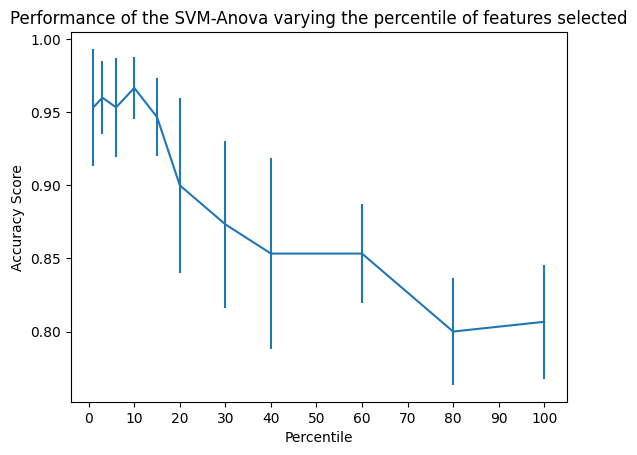

In [11]:
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

#### Percentiles

a statistical concept used to describe the relative standing or position of a particular value within a dataset. They help you understand how a specific data point compares to the rest of the data. Percentiles divide a dataset into 100 equal parts or groups, each representing a percentage of the data. For example, the 25th percentile represents the value below which 25% of the data falls.

Here are some common purposes of percentiles in statistics:

1. **Understanding Data Distribution:** Percentiles provide insights into the distribution of data. For instance, the median (50th percentile) tells you the value that splits the data into two equal halves, indicating the central tendency of the dataset.

2. **Identifying Outliers:** Percentiles can help identify outliers or extreme values. Values below the 1st percentile or above the 99th percentile may be considered outliers.

3. **Comparing Values:** Percentiles allow you to compare individual data points to the overall dataset. For example, if someone's test score is at the 90th percentile, it means their score is higher than 90% of the scores in the dataset.

4. **Data Summary:** Percentiles are often used in summary statistics, alongside measures like the mean, median, and standard deviation, to provide a more comprehensive view of the data's characteristics.

5. **Risk Assessment:** In finance and risk analysis, percentiles are used to assess the risk associated with certain investments or financial outcomes. For instance, a 5th percentile return represents a low return, indicating a high level of risk.

6. **Health and Growth Metrics:** In medical and pediatric fields, percentiles are used to track the growth of children. For example, a child's height or weight percentile can indicate how they compare to others of the same age and gender.

7. **Data Visualization:** Percentiles are used in various types of data visualizations, such as box plots and cumulative distribution plots, to provide a clear picture of data spread and variability.

Common percentiles include the 25th (1st quartile), 50th (median), and 75th (3rd quartile) percentiles. However, any percentile can be calculated depending on your specific needs. Percentiles are valuable tools for summarizing and interpreting datasets, making them an essential concept in statistics and data analysis.